Handwritten Digit Classification using Artificial Neural Networks (ANN) involves training a model to recognize and classify handwritten digits, typically from 0 to 9. The ANN learns patterns from labeled datasets, allowing it to generalize and accurately identify handwritten digits in unseen data.

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

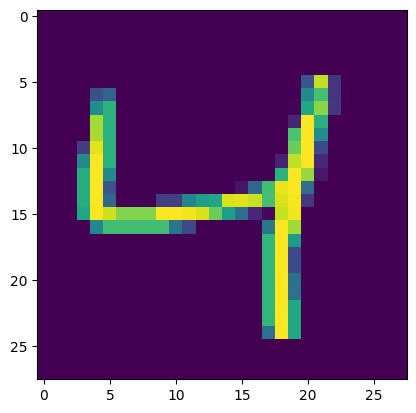

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [6]:
X_train = X_train/255
X_test = X_test/255

In [7]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))  #it will convert to 1D
model.add(Dense(128,activation='relu'))  # hidden layer
model.add(Dense(32,activation='relu'))   # hidden layer
model.add(Dense(10,activation='softmax')) # output layer

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 104,938 (409.91 KB)

 Trainable params: 104,938 (409.91 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history = model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9990 - loss: 0.0049 - val_accuracy: 0.9776 - val_loss: 0.2995
Epoch 2/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9995 - loss: 0.0023 - val_accuracy: 0.9769 - val_loss: 0.3236
Epoch 3/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9987 - loss: 0.0047 - val_accuracy: 0.9756 - val_loss: 0.3267
Epoch 4/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9993 - loss: 0.0027 - val_accuracy: 0.9766 - val_loss: 0.3104
Epoch 5/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9993 - loss: 0.0024 - val_accuracy: 0.9764 - val_loss: 0.3411
Epoch 6/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9987 - loss: 0.0046 - val_accuracy: 0.9741 - val_loss: 0.3554
Epoch 7/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.9758 - val_loss: 0.3339
Epoch 8/25
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9993 - loss: 0.0022 - 

In [18]:
y_prob = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [19]:
y_pred = y_prob.argmax(axis=1)
y_pred  # test image 1st is 7 2nd is 2 & so on

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9793

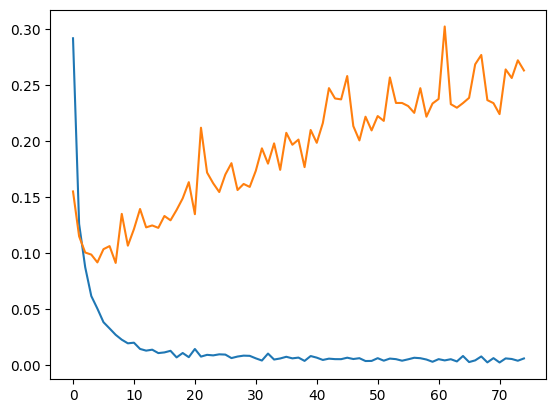

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

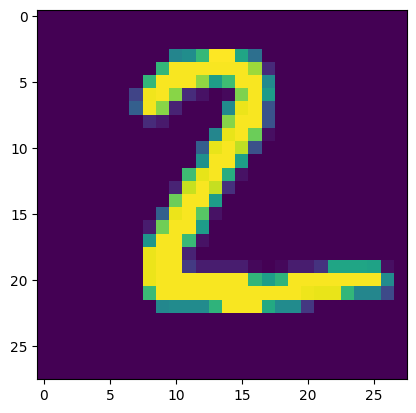

In [16]:
plt.imshow(X_test[1])

In [17]:
model.predict(X_test[1].reshape(1,28,28)).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([2], dtype=int64)